Load the required packages and needed data from the NOAA's Data Online Search. In this project we will focus on comparing percipitation observations from the regionally similar metro areas of Seattle and Vancouver.

In [30]:
# Import pandas, numpy, and matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# seaborn is a data visualization library built on matplotlib
import seaborn as sns

# set the plotting style
sns.set_style("whitegrid")

df_seattle = pd.read_csv('/Users/carterwebb/Desktop/5301_Foundation_Data/weather_5301_Webb/weather/data/seattle_rain.csv')

df_van = pd.read_csv('/Users/carterwebb/Desktop/5301_Foundation_Data/weather_5301_Webb/weather/data/van_rain.csv')

Lets find out the amount of information (or entries) we have in the Seattle data set. This info() command also allows us to see how many non NaN entries we have in each column.

In [31]:
df_seattle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1658 entries, 0 to 1657
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   STATION  1658 non-null   object 
 1   NAME     1658 non-null   object 
 2   DATE     1658 non-null   object 
 3   DAPR     23 non-null     float64
 4   MDPR     23 non-null     float64
 5   PRCP     1636 non-null   float64
 6   SNOW     353 non-null    float64
 7   SNWD     66 non-null     float64
 8   WESD     15 non-null     float64
 9   WESF     28 non-null     float64
dtypes: float64(7), object(3)
memory usage: 129.7+ KB


Lets do the same for Vancouver. 

In [32]:
df_van.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1796 entries, 0 to 1795
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   STATION  1796 non-null   object 
 1   NAME     1796 non-null   object 
 2   DATE     1796 non-null   object 
 3   PRCP     1673 non-null   float64
dtypes: float64(1), object(3)
memory usage: 56.3+ KB


In order to seemlessly plot our data we need to convert the provided date information into a more informative, non-string, object. In otherwords, pandas (pd) will allow us to convert our dates to numeric values ensuring that dates unlisted, dont simply fall out of our axis. 

In [33]:
df_seattle['DATE'] = pd.to_datetime(df_seattle['DATE'])

/var/folders/7s/t5l3pg4j2j54njys9zrdzdxr0000gn/T/ipykernel_18138/3087519436.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_seattle['DATE'] = pd.to_datetime(df_seattle['DATE'])


In [34]:
df_van['DATE'] = pd.to_datetime(df_seattle['DATE'])

Lets make sure both date columns were sucessfully changed to datetime objects with the .head(#of rows) function (base is 10 rows) or by simply asking for the df itself, which will show the head and tails of the df. By using explicit print() function here, I can force both to be shown simultaneously. 

In [35]:
print(df_seattle)
print(df_van)


          STATION                    NAME       DATE  DAPR  MDPR  PRCP  SNOW  \
0     US1WAKG0225  SEATTLE 2.1 ESE, WA US 2018-01-01   NaN   NaN  0.00   NaN   
1     US1WAKG0225  SEATTLE 2.1 ESE, WA US 2018-01-02   NaN   NaN  0.00   NaN   
2     US1WAKG0225  SEATTLE 2.1 ESE, WA US 2018-01-03   NaN   NaN  0.00   NaN   
3     US1WAKG0225  SEATTLE 2.1 ESE, WA US 2018-01-04   NaN   NaN  0.00   NaN   
4     US1WAKG0225  SEATTLE 2.1 ESE, WA US 2018-01-05   NaN   NaN  0.25   NaN   
...           ...                     ...        ...   ...   ...   ...   ...   
1653  US1WAKG0225  SEATTLE 2.1 ESE, WA US 2022-12-27   NaN   NaN  0.78   NaN   
1654  US1WAKG0225  SEATTLE 2.1 ESE, WA US 2022-12-28   NaN   NaN  0.40   NaN   
1655  US1WAKG0225  SEATTLE 2.1 ESE, WA US 2022-12-29   NaN   NaN  0.03   NaN   
1656  US1WAKG0225  SEATTLE 2.1 ESE, WA US 2022-12-30   NaN   NaN  0.62   NaN   
1657  US1WAKG0225  SEATTLE 2.1 ESE, WA US 2022-12-31   NaN   NaN  0.17   NaN   

      SNWD  WESD  WESF  
0      NaN   N

We can see from this output there may be an issue on the horizon. The tail of the Vancouver data set has a host NaT, or "Not a Time" dates. Lets plot these quickly to get a visual understanding. 

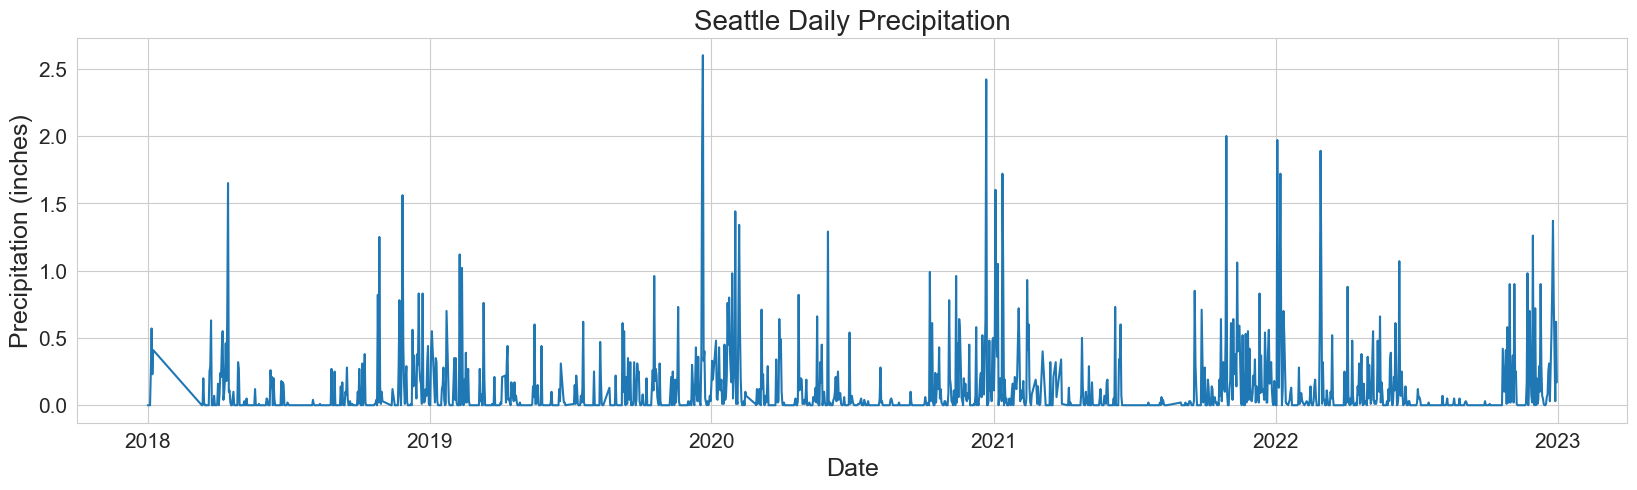

In [36]:
plt.figure(figsize=(20, 5))

sns.lineplot(data=df_seattle, x='DATE', y='PRCP')

plt.xlabel('Date', fontsize=18)
plt.ylabel('Precipitation (inches)', fontsize=18)
plt.title('Seattle Daily Precipitation', fontsize=20)

plt.tick_params(labelsize=15)

plt.show()

The Seattle Data Set, above, has one glaring hole in early 2018, while the Vancouver Data Set, below, has three glaring holes, and maybe two or three smaller ones, these could be where ther NaTs are located. 

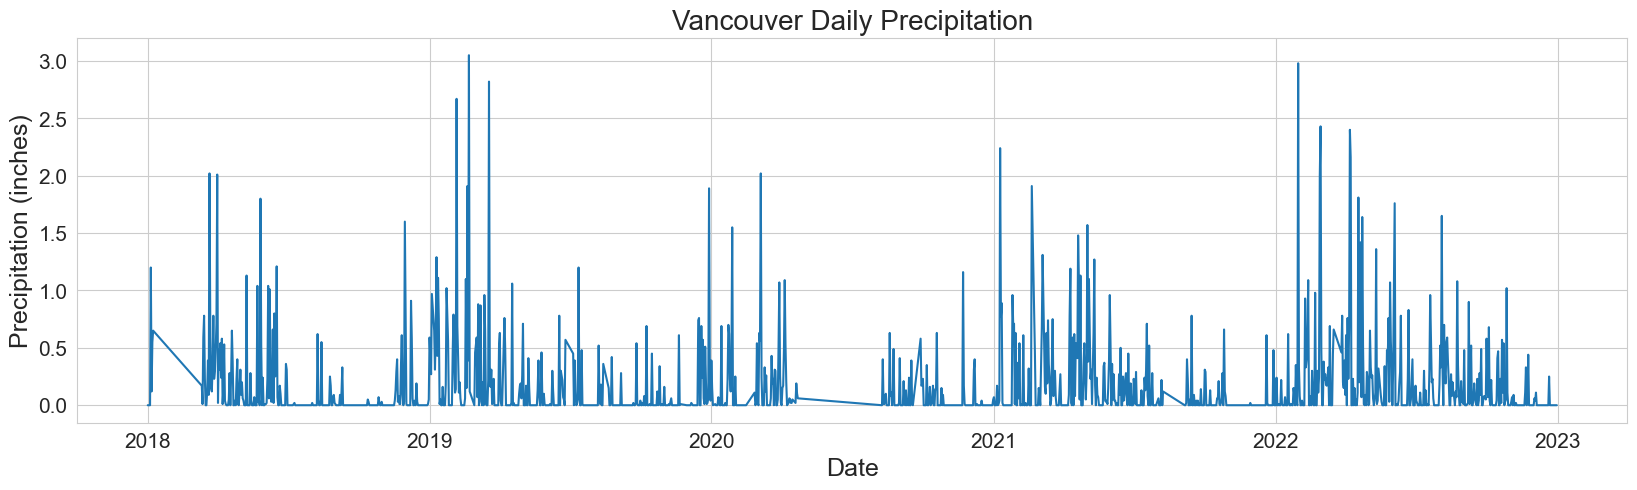

In [37]:
plt.figure(figsize=(20, 5))

sns.lineplot(data=df_van, x='DATE', y='PRCP')

plt.xlabel('Date', fontsize=18)
plt.ylabel('Precipitation (inches)', fontsize=18)
plt.title('Vancouver Daily Precipitation', fontsize=20)


plt.tick_params(labelsize=15)

plt.show()

Using the .loc object accesor, I can manualy index (or select) columns I want. .loc[rows , columns] is the generalized syntax. Here I am doing so by names but through .iloc I can also select via indexed number, with 0 being the first i. 

In [38]:
df_van_loc = df_van.loc[:, ['STATION', 'DATE', 'PRCP']]
df_van_loc.head()

,STATION,DATE,PRCP
0,CA001108446,2018-01-01,0.0
1,CA001108446,2018-01-02,0.0
2,CA001108446,2018-01-03,0.0
3,CA001108446,2018-01-04,0.0
4,CA001108446,2018-01-05,1.2


In [39]:
df_sea_loc = df_seattle.loc[:, ['STATION', 'DATE', 'PRCP']]
df_sea_loc.head()

,STATION,DATE,PRCP
0,US1WAKG0225,2018-01-01,0.00
1,US1WAKG0225,2018-01-02,0.00
2,US1WAKG0225,2018-01-03,0.00
3,US1WAKG0225,2018-01-04,0.00
4,US1WAKG0225,2018-01-05,0.25


Here we complete an outer join using the .merg function via the pandas package where the left (df_van) will be assigned the x variable and the right (df_seattle) the y variable.

In [40]:
df = df_van[['DATE', 'PRCP']].merge(df_seattle[['DATE', 'PRCP']], on='DATE', how='outer')

In [41]:
df

,DATE,PRCP_x,PRCP_y
0,NaT,0.0,NaN
1,NaT,0.0,NaN
2,NaT,0.0,NaN
3,NaT,0.0,NaN
4,NaT,0.0,NaN
...,...,...,...
1791,2022-12-27,0.0,0.78
1792,2022-12-28,0.0,0.40
1793,2022-12-29,0.0,0.03
1794,2022-12-30,0.0,0.62


By joining via "outer" we have perserved values that might have been absent in either data set and filled those with NaN. Though, you can see right away, there are still those pesky NaTs, lets dig a bit more. 

In [42]:
df.head(140)

,DATE,PRCP_x,PRCP_y
0,NaT,0.00,NaN
1,NaT,0.00,NaN
2,NaT,0.00,NaN
3,NaT,0.00,NaN
4,NaT,0.00,NaN
...,...,...,...
135,NaT,0.17,NaN
136,NaT,0.72,NaN
137,NaT,0.13,NaN
138,2018-01-01,0.00,0.0


Some quick math shows there is a difference of 138 observation between the two origional data sets. This is the same count as the number of NaTs in our new df and was, thus, introduced during the .merg from the Vancouver data set. All of these NaTs do have Vancouver Percipatiation recordings, some even >0, could these be our missing measurments we saw in the graph? But then why would the Seattle Data not have NaTs for its missing data? Still not sure what to make of this, but lets continue to keep it in mind. For now lets remove the NaTs.

In [43]:
df = df.iloc[138:]

Lets 'tidy' up our data set making each row a single observation. This is reminiscnet of work with tidyverse in R. While were at it lets rename out columns to be more meaninful as well. 

In [44]:
df = pd.melt(df, id_vars='DATE', var_name='city', value_name='precipitation')

In [45]:
df.head()

,DATE,city,precipitation
0,2018-01-01,PRCP_x,0.0
1,2018-01-02,PRCP_x,0.0
2,2018-01-03,PRCP_x,0.0
3,2018-01-04,PRCP_x,0.0
4,2018-01-05,PRCP_x,1.2


In [46]:
df.shape

(3316, 3)

Lets now rename out city identifies to be more meaninful using epxlicit indexing.

In [47]:
df.loc[df['city'] == 'PRCP_x', 'city'] = 'VAN'

In [48]:
df.loc[df['city'] == 'PRCP_y', 'city'] = 'SEA'

In [49]:
df

,DATE,city,precipitation
0,2018-01-01,VAN,0.00
1,2018-01-02,VAN,0.00
2,2018-01-03,VAN,0.00
3,2018-01-04,VAN,0.00
4,2018-01-05,VAN,1.20
...,...,...,...
3311,2022-12-27,SEA,0.78
3312,2022-12-28,SEA,0.40
3313,2022-12-29,SEA,0.03
3314,2022-12-30,SEA,0.62


Keeping with best practices lets also rename out DATE column to be lowercase.

In [50]:
df = df.rename(columns={'DATE': 'date'})

df.head()

,date,city,precipitation
0,2018-01-01,VAN,0.0
1,2018-01-02,VAN,0.0
2,2018-01-03,VAN,0.0
3,2018-01-04,VAN,0.0
4,2018-01-05,VAN,1.2


In [51]:
df

,date,city,precipitation
0,2018-01-01,VAN,0.00
1,2018-01-02,VAN,0.00
2,2018-01-03,VAN,0.00
3,2018-01-04,VAN,0.00
4,2018-01-05,VAN,1.20
...,...,...,...
3311,2022-12-27,SEA,0.78
3312,2022-12-28,SEA,0.40
3313,2022-12-29,SEA,0.03
3314,2022-12-30,SEA,0.62


How many NaNs do we have in our data set?

In [52]:
df.isna().sum()

date               0
city               0
precipitation    145
dtype: int64

What about indexed by city and just within precipitation?

In [53]:
df.loc[df['city'] == 'SEA', 'precipitation'].isna().sum()

np.int64(22)

In [54]:
df.loc[df['city'] == 'VAN', 'precipitation'].isna().sum()

np.int64(123)

Lets start trying to fill the NaN percipitation data found in the data sets.

In [55]:
df['day_of_year'] = pd.DatetimeIndex(df['date']).day_of_year

In [56]:
df

,date,city,precipitation,day_of_year
0,2018-01-01,VAN,0.00,1
1,2018-01-02,VAN,0.00,2
2,2018-01-03,VAN,0.00,3
3,2018-01-04,VAN,0.00,4
4,2018-01-05,VAN,1.20,5
...,...,...,...,...
3311,2022-12-27,SEA,0.78,361
3312,2022-12-28,SEA,0.40,362
3313,2022-12-29,SEA,0.03,363
3314,2022-12-30,SEA,0.62,364


In [57]:
mean_day_precipitation_sea = df.loc[
    df['city'] == 'SEA',
    ['precipitation', 'day_of_year']
].groupby(
    'day_of_year'
).mean()

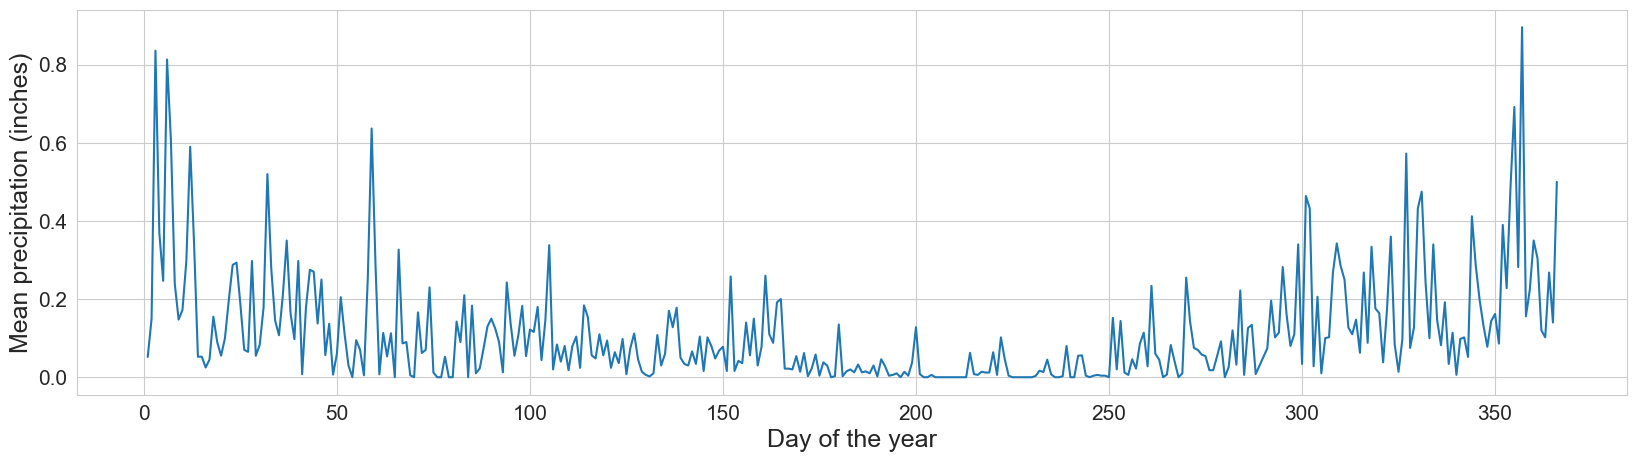

In [58]:
plt.figure(figsize=(20, 5))

sns.lineplot(data=mean_day_precipitation_sea, x='day_of_year', y='precipitation')

plt.xlabel('Day of the year', fontsize=18)
plt.ylabel('Mean precipitation (inches)', fontsize=18)

plt.tick_params(labelsize=15)

plt.show()

In [64]:
mean_day_precipitation_van = df.loc[
    df['city'] == 'VAN',
    ['precipitation', 'day_of_year']
].groupby(
    'day_of_year'
).mean()

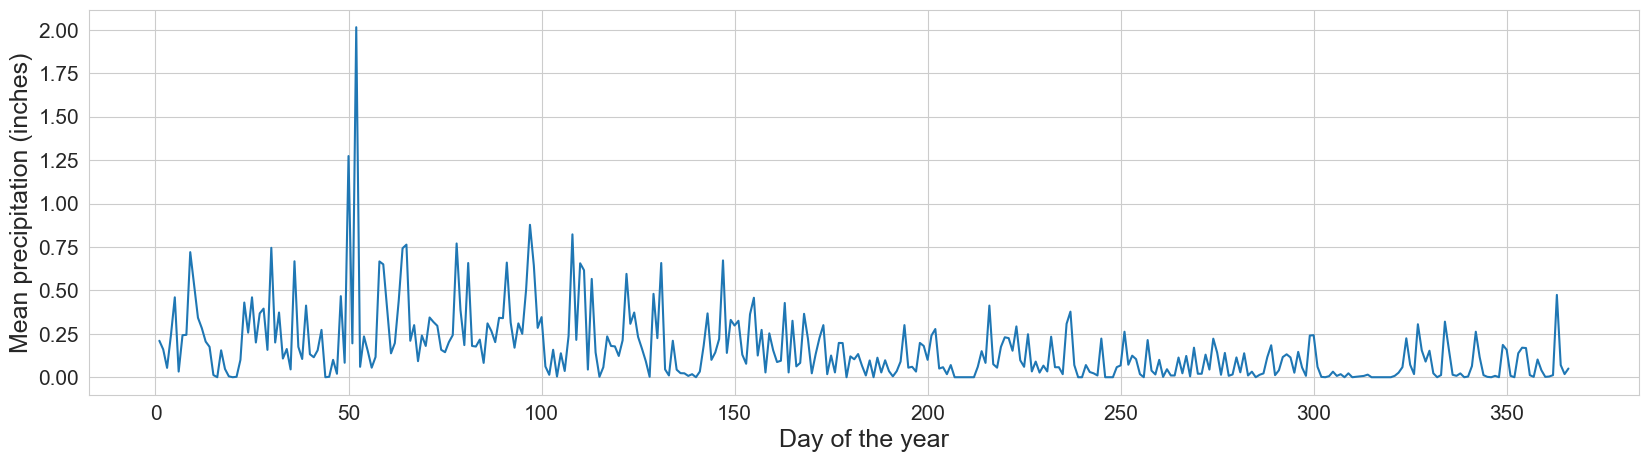

In [66]:
plt.figure(figsize=(20, 5))

sns.lineplot(data=mean_day_precipitation_van, x='day_of_year', y='precipitation')

plt.xlabel('Day of the year', fontsize=18)
plt.ylabel('Mean precipitation (inches)', fontsize=18)

plt.tick_params(labelsize=15)

plt.show()

In [59]:
indices_SEA = np.where(df['precipitation'].isna() & (df['city'] == 'SEA'))[0]

indices_VAN = np.where(df['precipitation'].isna() & (df['city'] == 'VAN'))[0]

In [60]:
indices_SEA

array([1900, 1955, 1972, 2001, 2038, 2112, 2117, 2157, 2251, 2286, 2327,
       2533, 2678, 2686, 2688, 2700, 2703, 2704, 2707, 2824, 2836, 3036])

In [62]:
indices_SEA.shape

(22,)

In [63]:
indices_VAN.shape

(123,)

In [68]:
for index in indices_SEA:
    df.loc[index, 'precipitation'] = mean_day_precipitation_sea.loc[df.loc[index,'day_of_year']].values[0]

In [70]:
for index in indices_VAN:
    df.loc[index, 'precipitation'] = mean_day_precipitation_van.loc[df.loc[index,'day_of_year']].values[0]

In [71]:
df.isna().sum()

date             0
city             0
precipitation    0
day_of_year      0
dtype: int64

In [72]:
df.to_csv('clean_seattle_vancouver_weather.csv', encoding='utf-8-sig', index=False)